In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, TargetEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [112]:
df = pd.read_csv("Real_Estate_Sales_10012020_to_Current.csv")

In [113]:
df

,OBJECTID,PropertyID,xrCompositeLandUseID,xrBuildingTypeID,ParcelID,LocationStartNumber,ApartmentUnitNumber,StreetNameAndWay,xrPrimaryNeighborhoodID,LandSF,...,OwnerFirstName,PrimaryGrantor,SaleDate,SalePrice,TotalAppraisedValue,LegalReference,xrSalesValidityID,xrDeedID,AssrLandUse,GlobalID
0,1,8,3,6.0,121-698-063,77,NaN,STAFFORD ST,2,6000.0,...,LAKESHA,SCOTT NASTASSIA,2024/07/01 00:00:00+00,259000.0,187200,08275 0343,1,10,ONE FAMILY,{78B6AAB5-D21E-471C-85BE-022DAB2A80B7}
1,2,9,3,3.0,121-698-062,73,NaN,STAFFORD ST,2,6000.0,...,ARCADIO,DIAZ RAFAEL,2022/04/26 00:00:00+00,208000.0,192300,07948-0001,1,10,ONE FAMILY,{15F34650-E463-4047-8808-A056FCDA3E09}
2,3,12,3,6.0,144-698-066,61,NaN,STAFFORD ST,2,6000.0,...,CATIRIA,KERN THOMAS,2023/12/22 00:00:00+00,125000.0,148400,08197-0077,1,10,ONE FAMILY,{C6FCA409-022A-4F1B-A674-13996FD1FE86}
3,4,20,3,6.0,144-698-058,29,NaN,STAFFORD ST,2,6000.0,...,REBECA,RAMOS MIGUEL JR,2023/09/29 00:00:00+00,1.0,167300,08158 0179,5,8,ONE FAMILY,{4D1DDED3-EF58-4091-A5F1-C7CA38B38C74}
4,5,25,3,6.0,144-698-053,211,NaN,NEWINGTON AVE,2,5040.0,...,LOURDES,BAIJANATH BISSNOW P,2021/01/11 00:00:00+00,177000.0,197900,07701-0245,1,10,ONE FAMILY,{F2E9A7CC-96D2-47AE-A2C1-59745FBE9C9E}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,7406,29769,7,18.0,161-503-064,98,B,BROOKFIELD ST,512,0.0,...,TAMMIE,ABEL QUALITY CONSTRUCTION LLC,2024/04/22 00:00:00+00,315000.0,249500,08242 0210,1,10,CONDOMINIMUM,{807D4D88-119F-478B-8783-2FCB6854D106}
7406,7407,29769,7,18.0,161-503-064,98,B,BROOKFIELD ST,512,0.0,...,TAMMIE,ABEL QUALITY CONSTRUCTION LLC,2024/05/17 00:00:00+00,0.0,249500,08251 0180,5,18,CONDOMINIMUM,{CA3871C1-EC6B-47AD-85B2-A93C8E4E49C8}
7407,7408,29769,7,18.0,161-503-064,98,B,BROOKFIELD ST,512,0.0,...,TAMMIE,BURGOS ISAAC,2024/08/26 00:00:00+00,0.0,249500,08296 0073,5,8,CONDOMINIMUM,{BF5642DB-2E1E-49E5-91BE-ABD301FB052E}
7408,7409,29770,7,18.0,161-503-065,98,C,BROOKFIELD ST,512,0.0,...,EDUARDO,ABEL QUALITY CONSTRUCTION LLC,2024/04/22 00:00:00+00,315000.0,249800,08242 0248,1,10,CONDOMINIMUM,{8B22BA6B-345F-4E00-8CFE-916BC92B6F32}


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7410 entries, 0 to 7409
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   OBJECTID                 7410 non-null   int64  
 1   PropertyID               7410 non-null   int64  
 2   xrCompositeLandUseID     7410 non-null   int64  
 3   xrBuildingTypeID         7409 non-null   float64
 4   ParcelID                 7410 non-null   object 
 5   LocationStartNumber      7410 non-null   int64  
 6   ApartmentUnitNumber      1938 non-null   object 
 7   StreetNameAndWay         7410 non-null   object 
 8   xrPrimaryNeighborhoodID  7410 non-null   int64  
 9   LandSF                   5479 non-null   float64
 10  TotalFinishedArea        7237 non-null   float64
 11  LivingUnits              7409 non-null   float64
 12  OwnerLastName            7410 non-null   object 
 13  OwnerFirstName           4515 non-null   object 
 14  PrimaryGrantor          

In [115]:
df.isnull().sum()

OBJECTID                      0
PropertyID                    0
xrCompositeLandUseID          0
xrBuildingTypeID              1
ParcelID                      0
LocationStartNumber           0
ApartmentUnitNumber        5472
StreetNameAndWay              0
xrPrimaryNeighborhoodID       0
LandSF                     1931
TotalFinishedArea           173
LivingUnits                   1
OwnerLastName                 0
OwnerFirstName             2895
PrimaryGrantor                1
SaleDate                      0
SalePrice                   339
TotalAppraisedValue           0
LegalReference                1
xrSalesValidityID             0
xrDeedID                      0
AssrLandUse                   0
GlobalID                      0
dtype: int64

In [116]:
df.nunique()

OBJECTID                   7410
PropertyID                 5113
xrCompositeLandUseID          8
xrBuildingTypeID             21
ParcelID                   5113
LocationStartNumber         647
ApartmentUnitNumber         788
StreetNameAndWay            421
xrPrimaryNeighborhoodID     159
LandSF                     1354
TotalFinishedArea          2781
LivingUnits                   8
OwnerLastName              3188
OwnerFirstName             1823
PrimaryGrantor             5456
SaleDate                    976
SalePrice                   914
TotalAppraisedValue        2287
LegalReference             6387
xrSalesValidityID            19
xrDeedID                     19
AssrLandUse                   8
GlobalID                   7410
dtype: int64

# Data Cleaning and Preprocessing

In [117]:
df.groupby('ParcelID')['PropertyID'].nunique().sort_values(ascending=False).head(10)

ParcelID
104-001-013    1
225-432-004    1
225-433-038    1
225-433-037    1
225-433-016    1
225-432-062    1
225-432-061    1
225-432-057    1
225-432-052    1
225-432-003    1
Name: PropertyID, dtype: int64

In [118]:
df.groupby('ParcelID')['PropertyID'].nunique().max()

1

In [119]:
df.groupby('AssrLandUse')['xrCompositeLandUseID'].describe()

,count,mean,std,min,25%,50%,75%,max
AssrLandUse,,,,,,,,
APT CRDA,4.0,455.0,0.0,455.0,455.0,455.0,455.0,455.0
APT FOUR,80.0,452.0,0.0,452.0,452.0,452.0,452.0,452.0
CONDO GARAGE,173.0,10.0,0.0,10.0,10.0,10.0,10.0,10.0
CONDOMINIMUM,1768.0,7.0,0.0,7.0,7.0,7.0,7.0,7.0
MULTI DWLG,6.0,9.0,0.0,9.0,9.0,9.0,9.0,9.0
ONE FAMILY,2477.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
THREE FAMILY,1617.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
TWO FAMILY,1285.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0


In [120]:
'''
Based on the exploratory analysis, 
we decided to remove features that either served only as unique identifiers or 
duplicated information already captured by other variables. 
Since these features did not add meaningful predictive value and could introduce unnecessary noise or redundancy, 
they were excluded from the feature set prior to modeling.
'''

df.drop(columns=['OBJECTID','GlobalID','PropertyID','xrCompositeLandUseID'], inplace=True)

# Remove records representing standalone garages rather than residential units
df = df[df['AssrLandUse'] != "CONDO GARAGE"]

# Remove individual rows with missing values
df= df[~df['PrimaryGrantor'].isnull() & ~df['LegalReference'].isnull() & ~df['xrBuildingTypeID'].isnull()]

# Remove rows with missing SalePrice
df = df[~df['SalePrice'].isnull()]

## Categorical Feature Processing

In [121]:
# Impute missing OwnerFirstName values based on matching OwnerLastName

df = df.copy()
mask_missing = df['OwnerFirstName'].isna()

# LLC → company
df.loc[
    mask_missing & df['OwnerLastName'].str.contains('llc', case=False, na=False),
    'OwnerFirstName'
] = 'company'

# NOT LLC → unknown
df.loc[
    mask_missing & ~df['OwnerLastName'].str.contains('llc', case=False, na=False),
    'OwnerFirstName'
] = 'unknown'

# Check
print("OwnerFirstName – השלמה לפי LLC")
print("--------------------------------")
print(f"הושלמו כ-company: {(df['OwnerFirstName'] == 'company').sum()}")
print(f"הושלמו כ-unknown: {(df['OwnerFirstName'] == 'unknown').sum()}")
print(f"נשארו חסרים: {df['OwnerFirstName'].isna().sum()}")

OwnerFirstName – השלמה לפי LLC
--------------------------------
הושלמו כ-company: 1737
הושלמו כ-unknown: 841
נשארו חסרים: 0


In [122]:
# mark as apartment if AssrLandUse contains any of these substrings
pattern = '|'.join(['CONDOMINIMUM', 'APT FOUR', 'MULTI DWLG', 'APT CRDA'])
df['apartment/privateProperty'] = np.where(df['AssrLandUse'].str.contains(pattern, case=False, na=False), 1, 2)

In [123]:
df = df.copy()

# PrivateHome → ApartmentUnitNumber = -2 (Includes non-missing values)
df.loc[
    df['apartment/privateProperty'] == 2,
    'ApartmentUnitNumber'
] = -2

# Apartment → LandSF = -1 (Includes non-missing values)
df.loc[
    df['apartment/privateProperty'] == 1,
    'LandSF'
] = -1


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6898 entries, 0 to 7409
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   xrBuildingTypeID           6898 non-null   float64
 1   ParcelID                   6898 non-null   object 
 2   LocationStartNumber        6898 non-null   int64  
 3   ApartmentUnitNumber        6806 non-null   object 
 4   StreetNameAndWay           6898 non-null   object 
 5   xrPrimaryNeighborhoodID    6898 non-null   int64  
 6   LandSF                     6898 non-null   float64
 7   TotalFinishedArea          6898 non-null   float64
 8   LivingUnits                6898 non-null   float64
 9   OwnerLastName              6898 non-null   object 
 10  OwnerFirstName             6898 non-null   object 
 11  PrimaryGrantor             6898 non-null   object 
 12  SaleDate                   6898 non-null   object 
 13  SalePrice                  6898 non-null   float64
 1

In [125]:
df.columns

Index(['xrBuildingTypeID', 'ParcelID', 'LocationStartNumber',
       'ApartmentUnitNumber', 'StreetNameAndWay', 'xrPrimaryNeighborhoodID',
       'LandSF', 'TotalFinishedArea', 'LivingUnits', 'OwnerLastName',
       'OwnerFirstName', 'PrimaryGrantor', 'SaleDate', 'SalePrice',
       'TotalAppraisedValue', 'LegalReference', 'xrSalesValidityID',
       'xrDeedID', 'AssrLandUse', 'apartment/privateProperty'],
      dtype='object')

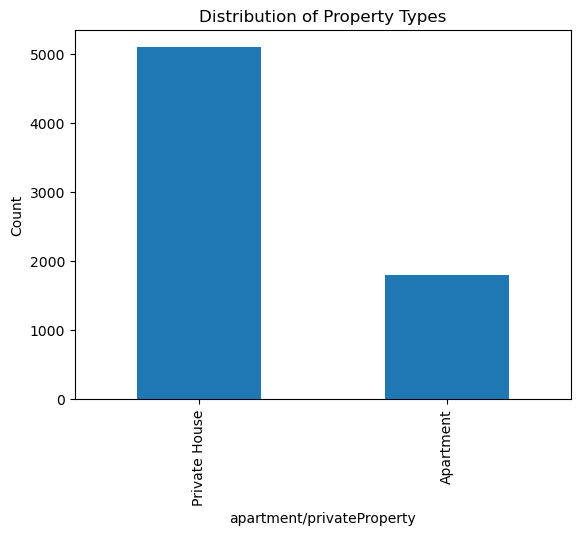

In [129]:
df['apartment/privateProperty'].replace({1: 'Apartment', 2: 'Private House'}).value_counts().plot(kind='bar')
plt.title('Distribution of Property Types')
plt.ylabel('Count')
plt.show()

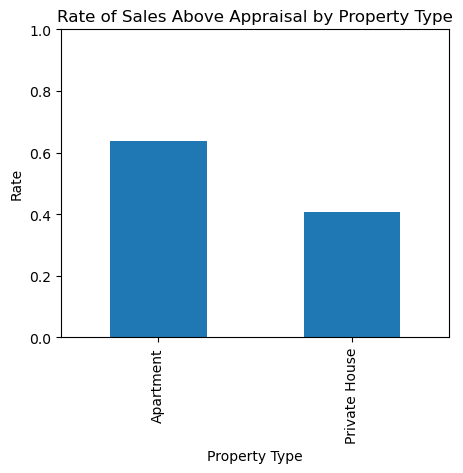

In [135]:
# יצירת משתנה מטרה
df['SaleAboveAppraisedValue'] = (
    df['SalePrice'] > df['TotalAppraisedValue']
).astype(int)

# החלפת הקידוד לשמות קריאים (לגרף בלבד)
df_plot = df.copy()
df_plot['PropertyType'] = df_plot['apartment/privateProperty'].replace({
    1: 'Apartment',
    2: 'Private House'
})

# חישוב שיעור מכירה מעל השווי
rate_by_type = df_plot.groupby('PropertyType')['SaleAboveAppraisedValue'].mean()

# ציור הגרף
plt.figure(figsize=(5,4))
rate_by_type.plot(kind='bar')
plt.title('Rate of Sales Above Appraisal by Property Type')
plt.ylabel('Rate')
plt.xlabel('Property Type')
plt.ylim(0, 1)
plt.show()


<Figure size 700x400 with 0 Axes>

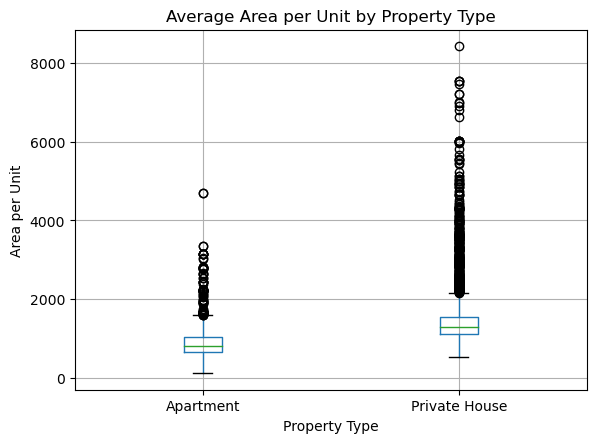

In [136]:
# יצירת פיצ'ר
df['AreaPerUnit'] = df['TotalFinishedArea'] / df['LivingUnits']

# עמודת תצוגה קריאה לגרף בלבד
df['PropertyTypeLabel'] = df['apartment/privateProperty'].replace({
    1: 'Apartment',
    2: 'Private House'
})

# ציור boxplot
plt.figure(figsize=(7,4))
df.boxplot(column='AreaPerUnit', by='PropertyTypeLabel')
plt.title('Average Area per Unit by Property Type')
plt.suptitle('')
plt.ylabel('Area per Unit')
plt.xlabel('Property Type')
plt.show()


In [90]:
df.select_dtypes(include=[np.number]).corr()

,xrBuildingTypeID,LocationStartNumber,xrPrimaryNeighborhoodID,LandSF,TotalFinishedArea,LivingUnits,SalePrice,TotalAppraisedValue,xrSalesValidityID,xrDeedID,apartment/privateProperty
xrBuildingTypeID,1.000000,0.004202,0.565508,-0.507460,0.058589,0.117684,0.178382,-0.027294,0.177042,0.109430,-0.750425
LocationStartNumber,0.004202,1.000000,-0.030673,0.098354,0.013587,-0.001885,-0.070842,0.021655,-0.043874,-0.027120,0.016914
xrPrimaryNeighborhoodID,0.565508,-0.030673,1.000000,-0.438349,-0.084015,-0.057335,0.183174,-0.140314,0.235627,0.092668,-0.709675
LandSF,-0.507460,0.098354,-0.438349,1.000000,0.092415,0.010038,-0.146901,0.163565,-0.189478,-0.085902,0.614791
TotalFinishedArea,0.058589,0.013587,-0.084015,0.092415,1.000000,0.987291,0.005809,0.980896,-0.047835,-0.010909,0.093732
LivingUnits,0.117684,-0.001885,-0.057335,0.010038,0.987291,1.000000,0.018135,0.957769,-0.029433,-0.003593,0.050974
SalePrice,0.178382,-0.070842,0.183174,-0.146901,0.005809,0.018135,1.000000,-0.010705,0.264780,0.250898,-0.244533
TotalAppraisedValue,-0.027294,0.021655,-0.140314,0.163565,0.980896,0.957769,-0.010705,1.000000,-0.084499,-0.020719,0.133828
xrSalesValidityID,0.177042,-0.043874,0.235627,-0.189478,-0.047835,-0.029433,0.264780,-0.084499,1.000000,0.066332,-0.275171
xrDeedID,0.109430,-0.027120,0.092668,-0.085902,-0.010909,-0.003593,0.250898,-0.020719,0.066332,1.000000,-0.109249


In [47]:
df.groupby('LivingUnits')['TotalFinishedArea'].describe()   

,count,mean,std,min,25%,50%,75%,max
LivingUnits,,,,,,,,
1.0,3993.0,1341.124970,848.531411,371.0,850.000000,1140.200010,1531.00000,8437.000
2.0,1267.0,2710.725981,711.201893,1058.0,2277.500000,2632.000000,3114.87500,9424.000
3.0,1554.0,3613.280026,570.521091,1781.0,3292.500000,3624.125005,3899.56250,6746.000
4.0,78.0,4025.773078,998.633964,1824.0,3261.000002,3840.000010,4662.65625,6019.625
6.0,2.0,666.000000,0.000000,666.0,666.000000,666.000000,666.00000,666.000
26.0,2.0,32692.000000,0.000000,32692.0,32692.000000,32692.000000,32692.00000,32692.000
214.0,2.0,293441.000000,0.000000,293441.0,293441.000000,293441.000000,293441.00000,293441.000


In [91]:
df['AverageUnitArea']= df['TotalFinishedArea'] / df['LivingUnits']

In [92]:
#df.drop(columns=['TotalFinishedArea', 'LivingUnits'], inplace=True)

In [93]:
df['SaleAboveAppraisedValue'] = np.where(df['SalePrice'] > df['TotalAppraisedValue'], 1, 0)

לא רלוונטי


In [94]:
"Check for invalid SalePrice values:"
"""invalid_price = df['SalePrice'].isna() | df['SalePrice'].isin(list(range(0, 1001)))
df.groupby('xrSalesValidityID').apply(
    lambda x: invalid_price.loc[x.index].mean()
).sort_values(ascending=False)"""

"invalid_price = df['SalePrice'].isna() | df['SalePrice'].isin(list(range(0, 1001)))\ndf.groupby('xrSalesValidityID').apply(\n    lambda x: invalid_price.loc[x.index].mean()\n).sort_values(ascending=False)"

In [95]:
"df['AssrLandUse'].value_counts()

SyntaxError: unterminated string literal (detected at line 1) (2561395.py, line 1)

In [96]:
"""summary = (
    df.groupby('xrSalesValidityID').agg(
        total_rows = ('SalePrice', 'size'),
        null_price = ('SalePrice', lambda x: x.isna().sum()),
        price_0 = ('SalePrice', lambda x: (x == 0).sum()),
        price_1 = ('SalePrice', lambda x: (x == 1).sum()),).sort_index())
summary"""

"summary = (\n    df.groupby('xrSalesValidityID').agg(\n        total_rows = ('SalePrice', 'size'),\n        null_price = ('SalePrice', lambda x: x.isna().sum()),\n        price_0 = ('SalePrice', lambda x: (x == 0).sum()),\n        price_1 = ('SalePrice', lambda x: (x == 1).sum()),).sort_index())\nsummary"

In [97]:
'''# 1. הגדרת מחיר "אמיתי"
df = df.copy()
df['is_real_price'] = df['SalePrice'].notna() & (df['SalePrice'] > 100)

# 2. פרופיל התנהגות לכל xrSalesValidityID
validity_profile = (
    df
    .groupby('xrSalesValidityID')['is_real_price']
    .mean()
)

# 3. הגדרת סף החלטה (רוב ברור)
REAL_PRICE_THRESHOLD = 0.8

real_price_codes = validity_profile[validity_profile >= REAL_PRICE_THRESHOLD].index
non_real_price_codes = validity_profile[validity_profile < REAL_PRICE_THRESHOLD].index

# 4. שמירת גודל לפני סינון
rows_before = len(df)

# 5. סינון רשומות לא עקביות
mask_consistent = (
    (df['xrSalesValidityID'].isin(real_price_codes) & df['is_real_price']) |
    (df['xrSalesValidityID'].isin(non_real_price_codes) & ~df['is_real_price'])
)

df_clean = df[mask_consistent].copy()

# 6. כמה נמחקו
rows_after = len(df_clean)
rows_removed = rows_before - rows_after

print(f"Rows before cleaning: {rows_before}")
print(f"Rows after cleaning:  {rows_after}")
print(f"Rows removed:        {rows_removed}")
'''

'# 1. הגדרת מחיר "אמיתי"\ndf = df.copy()\ndf[\'is_real_price\'] = df[\'SalePrice\'].notna() & (df[\'SalePrice\'] > 100)\n\n# 2. פרופיל התנהגות לכל xrSalesValidityID\nvalidity_profile = (\n    df\n    .groupby(\'xrSalesValidityID\')[\'is_real_price\']\n    .mean()\n)\n\n# 3. הגדרת סף החלטה (רוב ברור)\nREAL_PRICE_THRESHOLD = 0.8\n\nreal_price_codes = validity_profile[validity_profile >= REAL_PRICE_THRESHOLD].index\nnon_real_price_codes = validity_profile[validity_profile < REAL_PRICE_THRESHOLD].index\n\n# 4. שמירת גודל לפני סינון\nrows_before = len(df)\n\n# 5. סינון רשומות לא עקביות\nmask_consistent = (\n    (df[\'xrSalesValidityID\'].isin(real_price_codes) & df[\'is_real_price\']) |\n    (df[\'xrSalesValidityID\'].isin(non_real_price_codes) & ~df[\'is_real_price\'])\n)\n\ndf_clean = df[mask_consistent].copy()\n\n# 6. כמה נמחקו\nrows_after = len(df_clean)\nrows_removed = rows_before - rows_after\n\nprint(f"Rows before cleaning: {rows_before}")\nprint(f"Rows after cleaning:  {rows_after}"

In [98]:
df.nunique(), df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6898 entries, 0 to 7409
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   xrBuildingTypeID           6898 non-null   float64
 1   ParcelID                   6898 non-null   object 
 2   LocationStartNumber        6898 non-null   int64  
 3   ApartmentUnitNumber        6806 non-null   object 
 4   StreetNameAndWay           6898 non-null   object 
 5   xrPrimaryNeighborhoodID    6898 non-null   int64  
 6   LandSF                     6898 non-null   float64
 7   TotalFinishedArea          6898 non-null   float64
 8   LivingUnits                6898 non-null   float64
 9   OwnerLastName              6898 non-null   object 
 10  OwnerFirstName             6898 non-null   object 
 11  PrimaryGrantor             6898 non-null   object 
 12  SaleDate                   6898 non-null   object 
 13  SalePrice                  6898 non-null   float64
 1

(xrBuildingTypeID               20
 ParcelID                     4835
 LocationStartNumber           644
 ApartmentUnitNumber           678
 StreetNameAndWay              419
 xrPrimaryNeighborhoodID       159
 LandSF                       1317
 TotalFinishedArea            2726
 LivingUnits                     7
 OwnerLastName                3037
 OwnerFirstName               1822
 PrimaryGrantor               5179
 SaleDate                      973
 SalePrice                     910
 TotalAppraisedValue          2249
 LegalReference               6060
 xrSalesValidityID              19
 xrDeedID                       18
 AssrLandUse                     7
 apartment/privateProperty       2
 AverageUnitArea              2459
 SaleAboveAppraisedValue         2
 dtype: int64,
 None)

In [99]:
# Prepare data for classification
# Target feature: SaleAboveAppraisedValue (1 if SalePrice > TotalAppraisedValue, else 0)
# Features: numerical and categorical columns

# Convert SaleDate to datetime
df['SaleDate'] = pd.to_datetime(df['SaleDate'])

# Extract features from SaleDate
df['SaleYear'] = df['SaleDate'].dt.year
df['SaleMonth'] = df['SaleDate'].dt.month

'''
We selected the final feature set to include information that is both relevant and available prior to the sale. 
The chosen features represent property characteristics, location, and the timing of the transaction, 
along with the appraised value. Legal and administrative identifiers were deliberately excluded in order to avoid 
redundancy and potential information leakage.
'''

numerical_features = [ 'LandSF', 'AverageUnitArea', 'SaleYear', 'SaleMonth','TotalAppraisedValue']
high_cardinality_cols = ['xrPrimaryNeighborhoodID']
low_cardinality_cols = ['AssrLandUse', 'apartment/privateProperty', 'xrBuildingTypeID']
features = numerical_features + high_cardinality_cols + low_cardinality_cols
target = 'SaleAboveAppraisedValue'

X = df[features]
y = df[target]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### The objective of this study is to classify whether a property was sold above or below its appraised value. 
As no specific cost asymmetry between error types was assumed, model performance was evaluated using balanced metrics such as F1-score and ROC-AUC.

In [100]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('target_enc', TargetEncoder(target_type='binary'), high_cardinality_cols), 
        ('onehot', OneHotEncoder(handle_unknown='ignore'), low_cardinality_cols)
    ])
# Define models in pipelines with preprocessing
models = {
    'Logistic Regression': Pipeline([('preprocessor', preprocessor), ('classifier', LogisticRegression(random_state=42))]),
    'Decision Tree': Pipeline([('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(random_state=42))]),
    'Random Forest': Pipeline([('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))]),
    'XGBoost': Pipeline([('preprocessor', preprocessor), ('classifier', XGBClassifier(random_state=42))]),
    'SVM': Pipeline([('preprocessor', preprocessor), ('classifier', SVC(random_state=42, probability=True))])  # probability=True for ROC-AUC
}

# Train and evaluate each model
results = []
for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline.named_steps['classifier'], 'predict_proba') else None
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    cm = confusion_matrix(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Confusion Matrix': cm
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df.drop(columns=['Confusion Matrix']))

# Show confusion matrices
for result in results:
    print(f"\n{result['Model']} Confusion Matrix:")
    print(result['Confusion Matrix'])

C:\Users\Tal_e\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.644928   0.680672  0.489426  0.569420  0.677923
1        Decision Tree  0.563768   0.543860  0.561934  0.552749  0.562834
2        Random Forest  0.617391   0.627376  0.498489  0.555556  0.673696
3              XGBoost  0.616667   0.617699  0.527190  0.568867  0.677009
4                  SVM  0.650725   0.713270  0.454683  0.555351  0.680787

Logistic Regression Confusion Matrix:
[[566 152]
 [338 324]]

Decision Tree Confusion Matrix:
[[406 312]
 [290 372]]

Random Forest Confusion Matrix:
[[522 196]
 [332 330]]

XGBoost Confusion Matrix:
[[502 216]
 [313 349]]

SVM Confusion Matrix:
[[597 121]
 [361 301]]


# נסיונות - ללא עמודה מסוימת בכל פעם

In [109]:
# Prepare data for classification
# Target feature: SaleAboveAppraisedValue (1 if SalePrice > TotalAppraisedValue, else 0)
# Features: numerical and categorical columns

# Convert SaleDate to datetime
df['SaleDate'] = pd.to_datetime(df['SaleDate'])

# Extract features from SaleDate
df['SaleYear'] = df['SaleDate'].dt.year
df['SaleMonth'] = df['SaleDate'].dt.month

'''
We selected the final feature set to include information that is both relevant and available prior to the sale. 
The chosen features represent property characteristics, location, and the timing of the transaction, 
along with the appraised value. Legal and administrative identifiers were deliberately excluded in order to avoid 
redundancy and potential information leakage.
'''

numerical_features = [ 'LandSF', 'AverageUnitArea', 'SaleYear', 'SaleMonth']
high_cardinality_cols = ['xrPrimaryNeighborhoodID']
low_cardinality_cols = ['AssrLandUse', 'apartment/privateProperty', 'xrBuildingTypeID']
features = numerical_features + high_cardinality_cols + low_cardinality_cols
target = 'SaleAboveAppraisedValue'

X = df[features]
y = df[target]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('target_enc', TargetEncoder(target_type='binary'), high_cardinality_cols), 
        ('onehot', OneHotEncoder(handle_unknown='ignore'), low_cardinality_cols)
    ])
# Define models in pipelines with preprocessing
models = {
    'Logistic Regression': Pipeline([('preprocessor', preprocessor), ('classifier', LogisticRegression(random_state=42))]),
    'Decision Tree': Pipeline([('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(random_state=42))]),
    'Random Forest': Pipeline([('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))]),
    'XGBoost': Pipeline([('preprocessor', preprocessor), ('classifier', XGBClassifier(random_state=42))]),
    'SVM': Pipeline([('preprocessor', preprocessor), ('classifier', SVC(random_state=42, probability=True))])  # probability=True for ROC-AUC
}

# Train and evaluate each model
results = []
for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline.named_steps['classifier'], 'predict_proba') else None
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    cm = confusion_matrix(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Confusion Matrix': cm
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df.drop(columns=['Confusion Matrix']))

# Show confusion matrices
for result in results:
    print(f"\n{result['Model']} Confusion Matrix:")
    print(result['Confusion Matrix'])

C:\Users\Tal_e\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.640580   0.678112  0.477341  0.560284  0.677198
1        Decision Tree  0.597101   0.583072  0.561934  0.572308  0.596244
2        Random Forest  0.633333   0.643382  0.528701  0.580431  0.675315
3              XGBoost  0.607971   0.611830  0.500000  0.550291  0.664268
4                  SVM  0.649275   0.705069  0.462236  0.558394  0.676316

Logistic Regression Confusion Matrix:
[[568 150]
 [346 316]]

Decision Tree Confusion Matrix:
[[452 266]
 [290 372]]

Random Forest Confusion Matrix:
[[524 194]
 [312 350]]

XGBoost Confusion Matrix:
[[508 210]
 [331 331]]

SVM Confusion Matrix:
[[590 128]
 [356 306]]


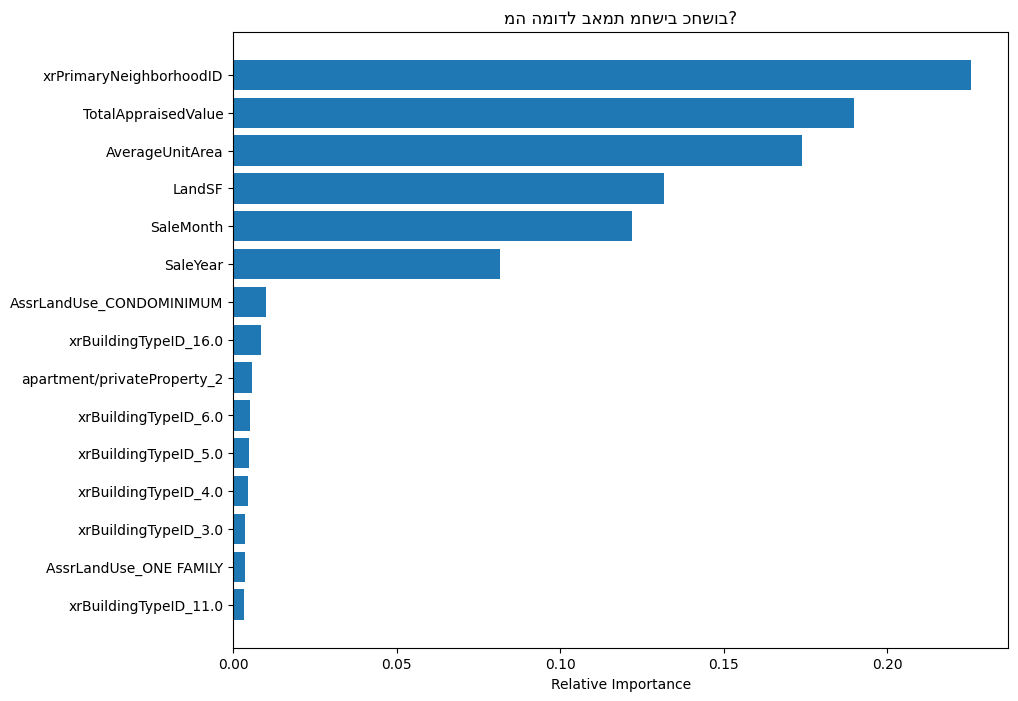

In [99]:


# נשתמש במודל ה-Random Forest שכבר אימנת בתוך ה-Pipeline
rf_model = models['Random Forest'].named_steps['classifier']

# חילוץ שמות הפיצ'רים אחרי ה-OneHotEncoding
cat_encoder = models['Random Forest'].named_steps['preprocessor'].transformers_[1][1]
encoded_cat_names = list(cat_encoder.get_feature_names_out(high_cardinality_cols)) + list(models['Random Forest'].named_steps['preprocessor'].transformers_[2][1].get_feature_names_out(low_cardinality_cols))
all_feature_names = numerical_features + encoded_cat_names

# קבלת החשיבות
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-15:] # 15 הכי חשובים

plt.figure(figsize=(10, 8))
plt.title('מה המודל באמת מחשיב כחשוב?')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [all_feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()